<a href="https://colab.research.google.com/github/ninivehelen/Analise_De_Dados/blob/master/dados_olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analisando dados de 120 anos de história olímpica** 







In [ ]:
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

In [ ]:
dados_olimpicos = pd.read_csv("/content/drive/MyDrive/athlete_events.csv")

In [ ]:
dados_olimpicos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Mudando nome das colunas**

In [ ]:
dados_olimpicos.rename(columns = {"ID":"id_atleta", "Name": "nome_atleta"	,"Sex":"sexo_atleta","Age":"idade",	"Height":"atleta_altura",	"Weight":"peso_atleta",	"Team":"equipe","Games":"ano_temporada", "Year":"ano","Season":"temporada","City":"cidade","Sport":"modalidade_esportiva"	,"Event":"evento",	"Medal": "medalha"},inplace = True)

In [ ]:
dados_olimpicos.head()

,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Dados que estão faltando**

In [ ]:
dados_olimpicos.isnull()

,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271112,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
271114,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


**Verificando dados duplicados**

In [ ]:
dados_olimpicos[dados_olimpicos.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


**Limpando dados duplicados**

In [ ]:
dados_olimpicos.drop_duplicates(inplace = True)

In [ ]:
dados_olimpicos[dados_olimpicos.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha


**Analisando dados dos atletas pelo sexo**

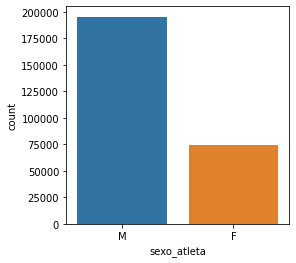

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="sexo_atleta",data= dados_olimpicos )
plt.show()

**Idade Maxima e Minima dos participantes de olimpiadas**

In [ ]:
dados_olimpicos["idade"].max()


97.0

In [ ]:
dados_olimpicos["idade"].min()

10.0

**Nome dos atletas**

In [ ]:
dados_olimpicos[dados_olimpicos["idade"] == 97.0]

,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [ ]:
dados_olimpicos[dados_olimpicos["idade"] == 10.0]


,id_atleta,nome_atleta,sexo_atleta,idade,atleta_altura,peso_atleta,equipe,NOC,ano_temporada,ano,temporada,cidade,modalidade_esportiva,evento,medalha
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


**Distribuição por idade dos jogadores**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição por Idade')

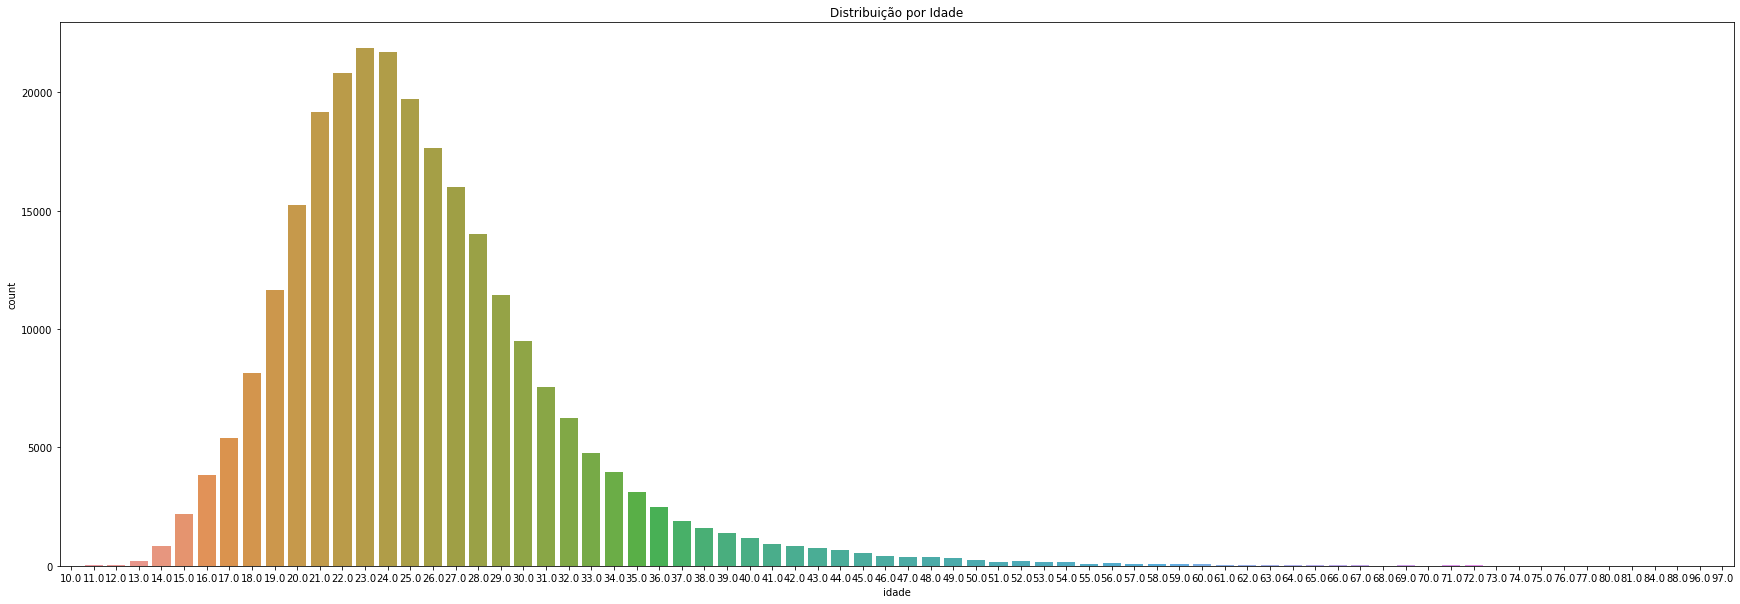

In [ ]:
plt.figure(figsize=(30,10))
plt.tight_layout()
sns.countplot(dados_olimpicos["idade"])
plt.title("Distribuição por Idade")

**Atleta que mais ganhou medalhas de ouro** 


In [142]:
dados_medalhas_ouro = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Gold"]

In [143]:
dados_medalhas_ouro.filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
"Michael Fred Phelps, II",23
"Raymond Clarence ""Ray"" Ewry",10
Mark Andrew Spitz,9
Paavo Johannes Nurmi,9
Larysa Semenivna Latynina (Diriy-),9
...,...
"Hermann ""Hannes"" Hansen",1
Hermann Alexandre de Pourtals,1
Hermann Gehri,1


**Atleta que mais ganhou medalhas de Prata** 


In [144]:
dados_medalhas_prata = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Silver"]

In [145]:
dados_medalhas_prata.filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
Aleksandr Vladimirovich Popov,6
Mikhail Yakovlevich Voronin,6
Shirley Frances Babashoff,6
Yang Yang,6
Aleksandr Nikolayevich Dityatin,6
...,...
Henry Anton Homburger,1
Henry Chandler Egan,1
Henry Charles Boucha,1


**Atleta que mais ganhou medalhas de Bronze** 

In [146]:
dados_medalhas_bronze = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Bronze"]

In [147]:
dados_medalhas_bronze.filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
Aleksey Yuryevich Nemov,6
Harri Tapani Kirvesniemi,6
Heikki Ilmari Savolainen,6
Franziska van Almsick,6
Merlene Joyce Ottey-Page,6
...,...
Heather L. Moody,1
Heather Petri,1
"Hector Dennis ""Hec"" Hogan",1


**Qual esporte tem mais medalhas**

In [148]:
dados_olimpicos.filter(items = ['medalha' ,'modalidade_esportiva']).groupby('modalidade_esportiva').count().sort_values(by='medalha',ascending=False)


,medalha
modalidade_esportiva,
Athletics,3969
Swimming,3048
Rowing,2945
Gymnastics,2256
Fencing,1743
...,...
Motorboating,7
Roque,3
Jeu De Paume,3


**Qual pais tem mais medalhas de Ouro**

In [149]:
medalhas_total_ouro = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Gold"]

In [150]:
medalhas_total_ouro.filter(items = ['medalha' ,'NOC']).groupby('NOC').count().sort_values(by='medalha',ascending=False)


,medalha
NOC,
USA,2638
URS,1082
GER,745
GBR,677
ITA,575
...,...
PAN,1
PER,1
SGP,1


**Qual pais tem mais medalhas de Prata**

In [151]:
medalhas_total_prata = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Silver"]

In [152]:
medalhas_total_prata.filter(items = ['medalha' ,'NOC']).groupby('NOC').count().sort_values(by='medalha',ascending=False)


,medalha
NOC,
USA,1641
GBR,739
URS,732
GER,674
FRA,602
...,...
ISV,1
KSA,1
NIG,1


**Qual país tem mais medalhas de Bronze**

In [153]:
medalhas_total_bronze = dados_olimpicos.loc[dados_olimpicos["medalha"] == "Bronze"]

In [154]:
medalhas_total_bronze.filter(items = ['medalha' ,'NOC']).groupby('NOC').count().sort_values(by='medalha',ascending=False)


,medalha
NOC,
USA,1358
GER,746
URS,689
FRA,666
GBR,651
...,...
MON,1
MOZ,1
SUR,1


**Atleta Brasileiro que mais teve medalhas de ouro**




In [130]:
dados_medalhas_brasil = dados_olimpicos.loc[dados_olimpicos["NOC"] == "BRA"]

In [131]:
dados_medalhas_brasil_ouro = dados_medalhas_brasil[dados_medalhas_brasil["medalha"] == "Gold"]

In [132]:
dados_medalhas_brasil_ouro .filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
"Fabiana ""Fabi"" Alvim de Oliveira",2
Torben Schmidt Grael,2
Fabiana Marcelino Claudino,2
Giovane Farinazzo Gvio,2
Paula Renata Marques Pequeno,2
...,...
Gabriel Barbosa Almeida,1
Fernanda Garay Rodrigues,1
"Fernanda ""Fernandinha"" Ferreira",1


**Atleta Brasileiro(a) que mais teve medalhas de Prata**


In [133]:
dados_medalhas_brasil_prata = dados_medalhas_brasil[dados_medalhas_brasil["medalha"] == "Silver"]

In [134]:
dados_medalhas_brasil_prata.filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
Ademir Roque Kaefer,2
Lus Carlos Coelho Winck,2
"Rodrigo ""Rodrigo"" Santana",2
Rosana dos Santos Augusto,2
Robert Scheidt,2
...,...
Edmar Bernardes dos Santos,1
Douglas Eduardo Vieira,1
"Domingos ""Domingos Maracan"" Lampariello Neto",1


**Atleta Brasileiro(a) que mais teve medalhas de Bronze**

In [135]:
dados_medalhas_brasil_bronze = dados_medalhas_brasil[dados_medalhas_brasil["medalha"] == "Bronze"]

In [136]:
dados_medalhas_brasil_bronze.filter(items = ['medalha' ,'nome_atleta']).groupby('nome_atleta').count().sort_values(by='medalha',ascending=False)


,medalha
nome_atleta,
"Edson ""Edson Bispo"" Bispo dos Santos",2
"Fernando ""Xuxa"" de Queiroz Scherer",2
"Carlos ""Mosquito"" Domingos Massoni",2
"Carmo ""Rosa Branca"" de Souza",2
Csar Augusto Cielo Filho,2
...,...
Helen Cristina Santos Luz,1
"Henrique ""Kiko"" Pellicano",1
Henrique Carlos Serra Azul Guimares,1


**Total de medalhas de Ouro do Brasil nas Olimpiadas**

---



In [137]:
dados_medalhas_brasil_ouro = dados_medalhas_brasil[dados_medalhas_brasil["medalha"] == "Gold"]

In [138]:
dados_medalhas_brasil_ouro["medalha"].count()



109

**Total de medalhas de Prata do Brasil nas Olimpiadas**

In [139]:
dados_medalhas_brasil_prata["medalha"].count()

175

**Total de medalhas de Bronze do Brasil nas Olimpiadas**

In [140]:
dados_medalhas_brasil_bronze["medalha"].count()

191